### tile函数的使用

In [1]:
import numpy as np

a = np.array([2, 0, 1])
a

array([2, 0, 1])

复制行2次

In [2]:
np.tile(a, (2, 1))

array([[2, 0, 1],
       [2, 0, 1]])

复制列2次

In [3]:
np.tile(a, (1, 2))

array([[2, 0, 1, 2, 0, 1]])

### 第一个kNN分类器

In [4]:
import numpy as np


def create_dataset():
    x = np.array(
        [
            [1.0, 1.1],
            [1.0, 1.0],
            [0, 0],
            [0, 0.1]
        ]
    )
    y = ['A', 'A', 'B', 'B']
    return x, y

create_dataset()

(array([[1. , 1.1],
        [1. , 1. ],
        [0. , 0. ],
        [0. , 0.1]]), ['A', 'A', 'B', 'B'])

In [5]:
import operator


def knn_classify(x_in, x, y, k):
    x_cnt = x.shape[0]  # Sample count of x
    diff_mat = np.tile(x_in, (x_cnt, 1)) - x
    sq_diff_mat = diff_mat ** 2
    sq_dist = sq_diff_mat.sum(axis=1)
    euc_dist = sq_dist ** 0.5 # Euclidean distance
    sorted_dist_index = euc_dist.argsort()
    class_cnt = dict()
    for i in sorted_dist_index[:k]:
        label = y[i]
        class_cnt[label] = class_cnt.get(label, 0) + 1
    sorted_class_cnt = sorted(
        class_cnt.items(),
        key=operator.itemgetter(1),
        reverse=True
    )
    return sorted_class_cnt[0][0]

x, y = create_dataset()
x_in = [0.1, 0.2]
knn_classify(x_in, x, y, 2)

'B'

In [6]:
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x[:, 0], x[:, 1])
ax.scatter(x_in[0], x_in[1])
for i in range(x.shape[0]):
    plt.annotate(
        y[i],
        xy=(x[i, 0], x[i, 1]),
        xytext=(x[i, 0]+0.02, x[i, 1])
    )
plt.show()

<Figure size 640x480 with 1 Axes>

### kNN applied on dating website

In [7]:
def head_file(n, file):
    with open(file, 'r') as f:
        line_no = 0
        for line in f.readlines():
            if line_no < n:
                print(line)
                line_no += 1
            else: 
                break
                
head_file(10, "datingTestSet2.txt")

40920	8.326976	0.953952	3

14488	7.153469	1.673904	2

26052	1.441871	0.805124	1

75136	13.147394	0.428964	1

38344	1.669788	0.134296	1

72993	10.141740	1.032955	1

35948	6.830792	1.213192	3

42666	13.276369	0.543880	3

67497	8.631577	0.749278	1

35483	12.273169	1.508053	3



In [8]:
# Indice a list
a = [1, 2, 3]
a[0:2]
a = np.array(a)
a[0:2]  # Index 2 is excluded

array([1, 2])

In [9]:
def file2matrix(data_file):
    with open(data_file, 'r') as f:
        lines = f.readlines()
        x_cnt = len(lines)
        x = np.zeros((x_cnt, 3))
        n = 0
        y = list()
        for line in lines:
            fields = line.split('\t')
            x[n, :] = fields[0:3]
            y.append(int(fields[-1]))
            n += 1
        return x, y
    
x, y = file2matrix("datingTestSet2.txt")

In [10]:
x

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [11]:
y[0:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

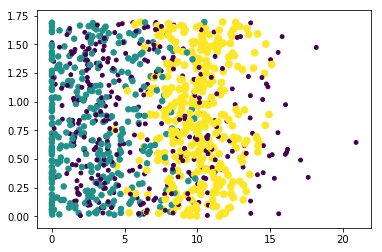

In [12]:
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x[:, 1], x[:, 2], 15.0*np.array(y), 15.0*np.array(y))
plt.show()

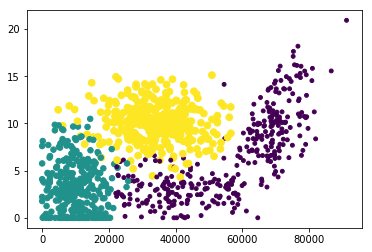

In [13]:
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x[:, 0], x[:, 1], 15.0*np.array(y), 15.0*np.array(y))
plt.show()

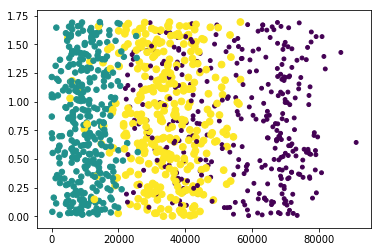

In [14]:
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x[:, 0], x[:, 2], 15.0*np.array(y), 15.0*np.array(y))
plt.show()

We can see field[0] and field[1] are more suitable to distinguish those dating person.

In [15]:
# Normalize the data set
def norm_data(dataset):
    min_vals = dataset.min(0)
    max_vals = dataset.max(0)
    ranges = max_vals-min_vals
    dataset_row_cnt = dataset.shape[0]
    mat_norm = (dataset-np.tile(min_vals, (dataset_row_cnt, 1)))\
        / np.tile(ranges, (dataset_row_cnt, 1))
    return mat_norm

norm_data(x)

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [16]:
# Test error rate of above classify method
def test_dating_classify(test_ratio, k):
    x, y = file2matrix("datingTestSet2.txt")
    total_cnt = x.shape[0]
    test_cnt = int(total_cnt*test_ratio)
    err_cnt = 0
    for i in range(test_cnt):
        result = knn_classify(x[i, :],
                              x[test_cnt, :],
                              y[test_cnt :],
                              k)
        if result != y[i]:
            err_cnt += 1
    return err_cnt / total_cnt
                                
                                        
test_dating_classify(0.1, 3)

0.071

In [17]:
x, y = file2matrix("datingTestSet2.txt")
x.shape

(1000, 3)

In [18]:
err_rate = 1
k = 0
for i in range(1, 1000):
    curr_err_rate = test_dating_classify(0.1, i)
    if curr_err_rate < err_rate:
        err_rate = curr_err_rate
        k = i
print("{} : {}".format(
    k,
    err_rate
))

1 : 0.071


### Handwriting

In [19]:
# Check the length and width of digit files
def get_file_shape(digit_file):
    w, l = 0, 0
    with open(digit_file, 'r') as f:
        lines = f.readlines()
        l = len(lines)
        long_line = ""
        for line in lines:
            if w < len(line.strip()):
                w = len(line.strip())
                long_line = line
        #print(long_line)
        '''
        ruler = ""
        for i in range(4):
            for j in range(10):
                ruler += str(j)
        print(ruler)
        '''
    return w, l

get_file_shape('trainingDigits/1_10.txt')
            

(32, 32)

In [20]:
import os


# Check all the digit files in dirs
def get_file_shape_in_dirs(dirs):
    w, l = 0, 0
    for dir in dirs:
        for item in os.listdir(dir):
            item_path = os.path.join(dir, item)
            if os.path.isfile(item_path):
                x, y = get_file_shape(item_path)
                if x > w: w = x
                if y > l: l = y
    return w, l

dirs = [
    "testDigits",
    "trainingDigits"
]
get_file_shape_in_dirs(dirs)

(32, 32)

In [21]:
# Convert digit file to vectors
def img2vector(digit_file):
    digit_vect = np.zeros((1, 32*32)) # initialize
    with open(digit_file, 'r') as f:
        row = 0
        for line in f:
            col = 0
            for c in line.strip():
                digit_vect[0, row*32 + col] = int(c)
                col += 1
            row += 1
    return digit_vect

test = img2vector("trainingDigits/1_10.txt")
test[0, :31]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
# Classify using kNN and test results
import os


def handwriting_class_test():
    train_file_list = os.listdir("trainingDigits")
    n_x = len(train_file_list)
    x = np.zeros((n_x, 32 * 32))
    y = list()
    err_cnt = 0
    i = 0
    for train_file in train_file_list:
        x[i,] = img2vector(os.path.join("trainingDigits", train_file))
        y.append(int(train_file.split('_')[0]))
        i += 1
    j = 0
    for test_file in os.listdir("testDigits"):
        x_in = img2vector(os.path.join("testDigits", test_file))
        y_in = int(test_file.split('_')[0])
        result = knn_classify(x_in, x, y, 3)
        if result != y_in:
            err_cnt += 1
        j += 1
    return err_cnt / j

handwriting_class_test()

0.011627906976744186